In [14]:
import cv2
import mediapipe as mp
import pandas as pd
from scipy.signal import find_peaks, argrelmin
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
# Initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(
    min_detection_confidence=0.6,
    min_tracking_confidence=0.6)

video_path = 'frontal_videos/P3_E3T4_Rear.mp4'

In [9]:
# Display the vidoe with the keypoints and skeleton

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    _, frame = cap.read()

    try:
        RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = pose.process(RGB)

        if results.pose_landmarks is not None:
            # Create a dictionary to map keypoints to labels
            keypoints_labels = {
                mp_pose.PoseLandmark.LEFT_ANKLE: 'LEFT ANKLE',
                #mp_pose.PoseLandmark.LEFT_KNEE: 'LEFT KNEE',
                #mp_pose.PoseLandmark.LEFT_HEEL: 'LEFT HEEL',
                #mp_pose.PoseLandmark.LEFT_FOOT_INDEX: 'LEFT FOOT INDEX',
                #mp_pose.PoseLandmark.LEFT_HIP: 'LEFT HIP',
                
                mp_pose.PoseLandmark.RIGHT_ANKLE: 'RIGHT ANKLE',
                #mp_pose.PoseLandmark.RIGHT_KNEE: 'RIGHT KNEE',
                #mp_pose.PoseLandmark.RIGHT_HEEL: 'RIGHT HEEL',
                #mp_pose.PoseLandmark.RIGHT_FOOT_INDEX: 'RIGHT FOOT INDEX',
                #mp_pose.PoseLandmark.RIGHT_HIP: 'RIGHT HIP',
            }
            
            # Iterate over the pose landmarks and label them
            for landmark in mp_pose.PoseLandmark:
                if landmark in keypoints_labels.keys():
                    landmark_index = landmark.value
                    landmark_name = keypoints_labels[landmark]
                    data_point = results.pose_landmarks.landmark[landmark_index]
                    x = data_point.x * frame.shape[1]  # Multiply by width to get x-coordinate in pixels
                    y = data_point.y * frame.shape[0]  # Multiply by height to get y-coordinate in pixels

                    # Draw a label near the keypoint
                    cv2.putText(frame, f"{landmark_name}", (int(x), int(y) - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
                    
        # Draw detected skeleton on the frame
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Show the final output
        cv2.imshow('Output', frame)

    except:
        break

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



In [23]:
# Create the dataframe with coordinates for important keypoints

cap = cv2.VideoCapture(video_path)

time = []

right_ankle_x = []
right_ankle_y = []

left_ankle_x = []
left_ankle_y = []

right_heel_x = []
right_heel_y = []

left_heel_x = []
left_heel_y = []

right_knee_x = []
right_knee_y = []

left_knee_x = []
left_knee_y = []

right_foot_index_x = []
right_foot_index_y = []

left_foot_index_x = []
left_foot_index_y = []

right_hip_x = []
left_hip_x = []

while cap.isOpened():
    # read frame from capture object
    _, frame = cap.read()

    try:
        # convert the frame to RGB format
        RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # process the RGB frame to get the result
        results = pose.process(RGB)

        if results.pose_landmarks is not None:
            # Create a dictionary to map keypoints to labels
            keypoints_labels = {
                mp_pose.PoseLandmark.LEFT_ANKLE: 'LEFT ANKLE',
                mp_pose.PoseLandmark.LEFT_KNEE: 'LEFT KNEE',
                mp_pose.PoseLandmark.LEFT_HEEL: 'LEFT HEEL',
                mp_pose.PoseLandmark.LEFT_FOOT_INDEX: 'LEFT FOOT INDEX',
                mp_pose.PoseLandmark.LEFT_HIP: 'LEFT HIP',
                
                mp_pose.PoseLandmark.RIGHT_ANKLE: 'RIGHT ANKLE',
                mp_pose.PoseLandmark.RIGHT_KNEE: 'RIGHT KNEE',
                mp_pose.PoseLandmark.RIGHT_HEEL: 'RIGHT HEEL',
                mp_pose.PoseLandmark.RIGHT_FOOT_INDEX: 'RIGHT FOOT INDEX',
                mp_pose.PoseLandmark.RIGHT_HIP: 'RIGHT HIP',
            }


            time.append(cap.get(cv2.CAP_PROP_POS_MSEC))
            
            # Iterate over the pose landmarks and label them
            for landmark in mp_pose.PoseLandmark:
                if landmark in keypoints_labels.keys():
                    landmark_index = landmark.value
                    landmark_name = keypoints_labels[landmark]
                    data_point = results.pose_landmarks.landmark[landmark_index]
                    x = data_point.x * frame.shape[1]  # Multiply by width to get x-coordinate in pixels
                    y = data_point.y * frame.shape[0]  # Multiply by height to get y-coordinate in pixels
                    
                    if landmark == mp_pose.PoseLandmark.RIGHT_ANKLE:
                        right_ankle_x.append(int(x))
                        right_ankle_y.append(int(y))
                    
                    elif landmark == mp_pose.PoseLandmark.LEFT_ANKLE:
                        left_ankle_x.append(int(x))
                        left_ankle_y.append(int(y))
                        
                    elif landmark == mp_pose.PoseLandmark.RIGHT_HEEL:
                        right_heel_x.append(int(x))
                        right_heel_y.append(int(y))
                    
                    elif landmark == mp_pose.PoseLandmark.LEFT_HEEL:
                        left_heel_x.append(int(x))
                        left_heel_y.append(int(y))
                        
                    elif landmark == mp_pose.PoseLandmark.RIGHT_FOOT_INDEX:
                        right_foot_index_x.append(int(x))
                        right_foot_index_y.append(int(y))
                    
                    elif landmark == mp_pose.PoseLandmark.LEFT_FOOT_INDEX:
                        left_foot_index_x.append(int(x))
                        left_foot_index_y.append(int(y))
                        
                    elif landmark == mp_pose.PoseLandmark.RIGHT_HIP:
                        right_hip_x.append(int(x))
                        
                    elif landmark == mp_pose.PoseLandmark.LEFT_HIP:
                        left_hip_x.append(int(x))


    except:
        break

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

pelvis = ((np.array(right_hip_x) + np.array(left_hip_x)) / 2).tolist()

data = {
    'time': np.array(time) / 1000,
    'right_ankle_x': right_ankle_x,
    'right_ankle_y': right_ankle_y,
    'left_ankle_x': left_ankle_x,
    'left_ankle_y': left_ankle_y,
    'right_heel_x': right_heel_x,
    'right_heel_y': right_heel_y,
    'left_heel_x': left_heel_x,
    'left_heel_y': left_heel_y,
    'right_foot_index_x': right_foot_index_x,
    'right_foot_index_y': right_foot_index_y,
    'left_foot_index_x': left_foot_index_x,
    'left_foot_index_y': left_foot_index_y,
    'pelvis': pelvis
}

df = pd.DataFrame(data)

print(df)


        time  right_ankle_x  right_ankle_y  left_ankle_x  left_ankle_y  \
0   0.000000            639            588           620           590   
1   0.033333            642            613           623           620   
2   0.066667            640            639           613           653   
3   0.100000            640            666           613           678   
4   0.133333            639            668           616           684   
..       ...            ...            ...           ...           ...   
89  2.966667            618            554           583           553   
90  3.000000            617            554           582           553   
91  3.033333            617            554           582           553   
92  3.066667            617            554           582           553   
93  3.100000            617            554           583           553   

    right_heel_x  right_heel_y  left_heel_x  left_heel_y  right_foot_index_x  \
0            640           599 

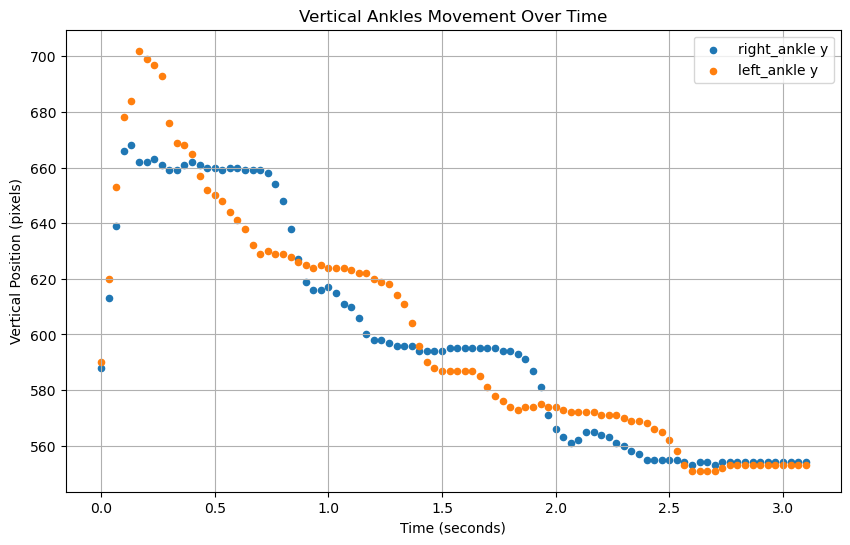

In [24]:
def plot_y_keypoints(dataframe, keypoints_names, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(keypoints_names)):
        x_col = f'{keypoints_names[i]}_x'
        y_col = f'{keypoints_names[i]}_y'
        
        plt.scatter(dataframe['time'], dataframe[y_col], label=f'{keypoints_names[i]} y', s=20)
#         plt.plot(dataframe['time'], dataframe[y_col], label=f'{keypoints_names[i]} y')
        
    plt.xlabel('Time (seconds)')
    plt.ylabel('Vertical Position (pixels)')
    plt.title('Vertical ' + title)
    plt.legend()
    plt.grid(True)
    plt.show()
    
def graphKeypointPositions():
    ankles_keypoints = ['right_ankle', 'left_ankle']
    heels_keypoints = ['right_heel', 'left_heel']
    toe_indices_keypoints = ['right_foot_index', 'left_foot_index']

    plot_y_keypoints(df, ankles_keypoints, 'Ankles Movement Over Time')
#     plot_keypoints_scatter(df, heels_keypoints, 'Heels Movement Over Time')
#     plot_keypoints_scatter(df, toe_indices_keypoints, 'Toe Indices Movement Over Time')
    
graphKeypointPositions()

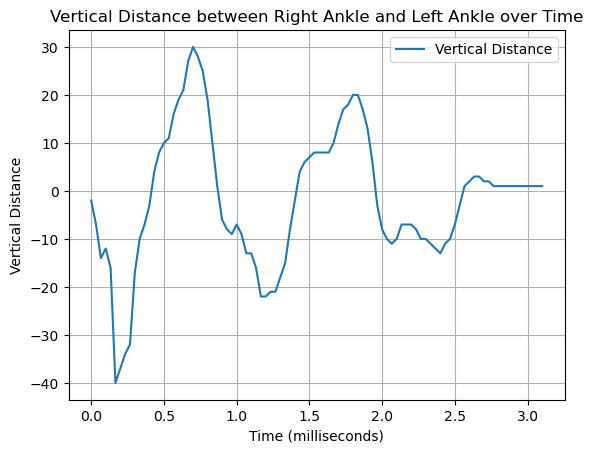

In [25]:
ankle_distance = pd.DataFrame()
ankle_distance['time'] = df['time']
ankle_distance['vertical_ankle_distance'] = df['right_ankle_y'] - df['left_ankle_y']

# Plot the vertical distance over time
plt.plot(ankle_distance['time'], ankle_distance['vertical_ankle_distance'], label='Vertical Distance')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Vertical Distance')
plt.title('Vertical Distance between Right Ankle and Left Ankle over Time')
plt.legend()
plt.grid()
plt.show()

In [26]:
def calc_extrema(df, keypoint, max_range=10):
    # Find local maxima using find_peaks with width parameter
    max_peaks, _ = find_peaks(df[keypoint].values, width=max_range)
    max_peak_values = df[keypoint].iloc[max_peaks]
    max_peak_times = df['time'].iloc[max_peaks]
    
    # Find local minima using find_peaks with width parameter
    min_peaks, _ = find_peaks(-df[keypoint].values, width=max_range)
    min_peak_values = df[keypoint].iloc[min_peaks]
    min_peak_times = df['time'].iloc[min_peaks]
    
    # Sort maxima and minima indices by values
    sorted_max_indices = np.argsort(max_peak_values)
    sorted_min_indices = np.argsort(min_peak_values)
    
    selected_max_indices = max_peaks[sorted_max_indices]
    selected_min_indices = min_peaks[sorted_min_indices]
    
    selected_max_values = df[keypoint].iloc[selected_max_indices]
    selected_max_times = df['time'].iloc[selected_max_indices]
    
    selected_min_values = df[keypoint].iloc[selected_min_indices]
    selected_min_times = df['time'].iloc[selected_min_indices]
    
    plt.plot(df['time'], df[keypoint])
    plt.plot(selected_max_times, selected_max_values, 'ro', label='Left Heel Strike')
    plt.plot(selected_min_times, selected_min_values, 'bo', label='Right Heel Strike')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Ankle Vertical Distance (Pixels)')
    plt.title('Ankle Vertical Distance over Time with Extrema')
    plt.legend()
    plt.show()
    
    max_array = np.array([selected_max_times, selected_max_values]).T
    min_array = np.array([selected_min_times, selected_min_values]).T
    
    # Sort the arrays by time
    max_array.sort(axis=0)  
    min_array.sort(axis=0)  

    return max_array, min_array

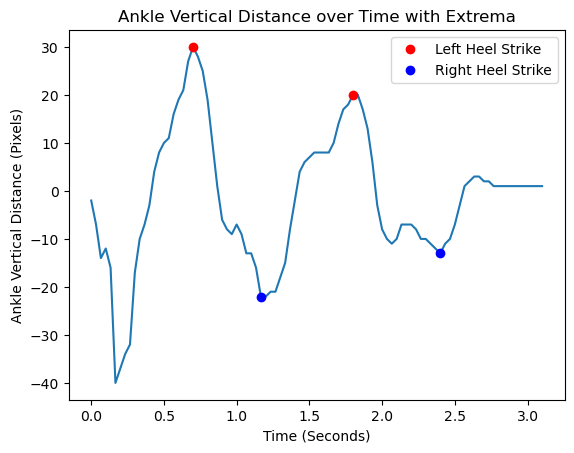

Left Heel Strikes:
 [[ 0.7 20. ]
 [ 1.8 30. ]]

Right Heel Strikes:
 [[  1.16666667 -22.        ]
 [  2.4        -13.        ]]


In [27]:
left_heel_strikes, right_heel_strikes = calc_extrema(ankle_distance, 'vertical_ankle_distance', max_range=5)

print("Left Heel Strikes:\n", left_heel_strikes)
print("\nRight Heel Strikes:\n", right_heel_strikes)
